C:\Users\Connor\AppData\Local\Temp\ipykernel_11252\1661905505.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


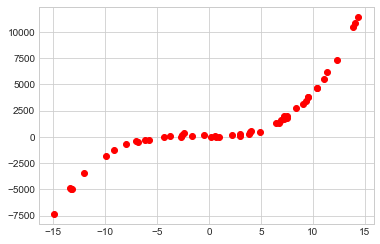

In [1]:
#Simulated data provided via HW1

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 12 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [8]:
import numpy as np

#We will assume m = 3, as it looks like a third order polynomial function
#This is particularly true at (0, 0)
m = 3

#Polyfit expects one dimensional x and y input
x_1d = x.flatten()
y_1d = y.flatten()
coeff = np.polyfit(x_1d, y_1d, m)
poly = np.poly1d(coeff)

#Generate data values according to our new polynomial
x_fit = np.linspace(x.min(), x.max(), number_of_samples)
y_fit = poly(x_fit)

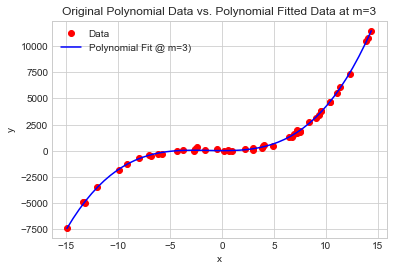

In [9]:
#Plot original data compared to our fitted polynomial data
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_fit, y_fit, 'b-', label=f'Polynomial Fit @ m=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Polynomial Data vs. Polynomial Fitted Data at m=3')
plt.legend()
plt.show()

In [21]:
#Find MSE for each order m
order = range(1, 9)
mse_data = []

for m in order:
    coeff = np.polyfit(x_1d, y_1d, m)
    poly = np.poly1d(coeff)
    y_pred = poly(x_1d)
    mse = np.mean((y_pred - y.flatten()) ** 2)
    mse_data.append(mse)

print(mse_data)

[2957230.853561439, 2361729.890700776, 9514.347771886034, 9397.592513152249, 9298.342247557755, 9037.66658825054, 8986.387046032733, 8735.659405622413]


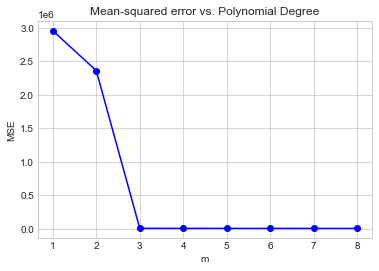

In [30]:
# Plot the MSE values versus the polynomial degrees
plt.plot(order, mse_data, 'bo-')
plt.xlabel('m')
plt.ylabel('MSE')
plt.title('Mean-squared error vs. Polynomial Degree')
plt.show()

In [28]:
#Determine the best value of m from mse_data array
m_optimal_idx = np.argmin(mse_data)
m_optimal = order[m_optimal_idx]
print("Optimal m value is: ")
print(m_optimal) 

Optimal m value is: 
8


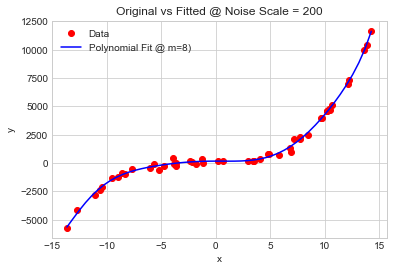

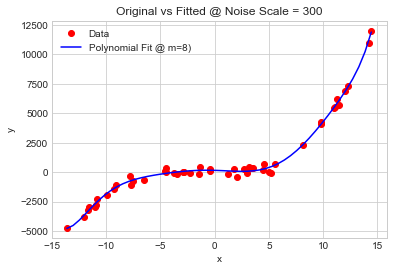

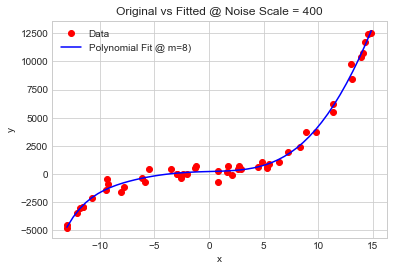

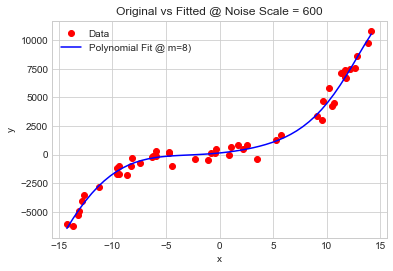

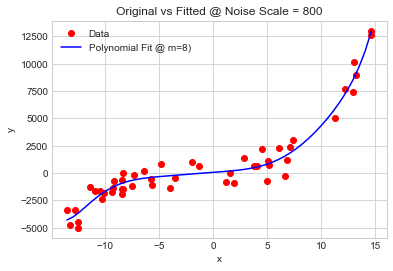

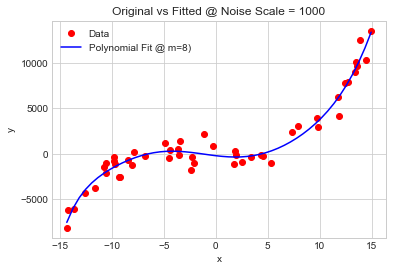

In [40]:
#Changing variable noise scale
noise_scale = [200, 300, 400, 600, 800, 1000]

for noise in noise_scale:
    
    #Generate baseline waveform
    number_of_samples = 50
    x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 12 * x**2 + 3 * x**3 + noise*np.random.randn(number_of_samples, 1)

    x_1d = x.flatten()
    y_1d = y.flatten()
    coeff = np.polyfit(x_1d, y_1d, m_optimal)
    poly = np.poly1d(coeff)
    x_fit = np.linspace(x.min(), x.max(), number_of_samples)
    y_fit = poly(x_fit)

    #Generate fitted polynomial with optimal order from part two
    plt.plot(x, y, 'ro', label='Data')
    plt.plot(x_fit, y_fit, 'b-', label=f'Polynomial Fit @ m={m_optimal})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original vs Fitted @ Noise Scale = {}'.format(noise))
    plt.legend()
    plt.show()

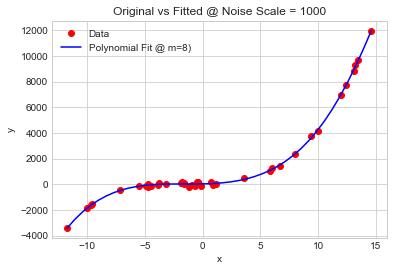

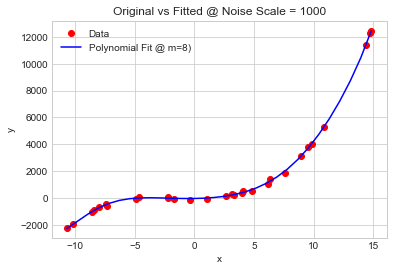

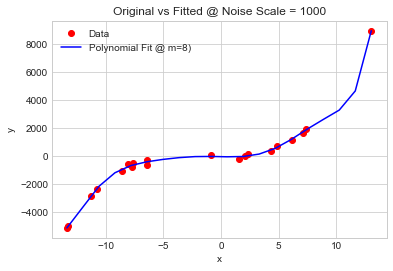

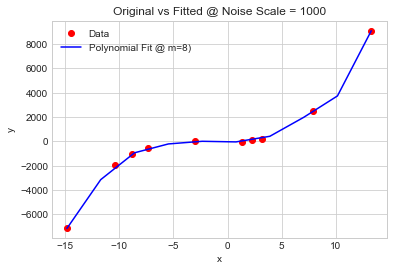

In [42]:
#Changing variable number_of_samples
number_of_samples = [40, 30, 20, 10]

for samples in number_of_samples:
    
    #Generate baseline waveform
    noise_scale = 100
    x = 30*(np.random.rand(samples, 1) - 0.5)
    y = 5 * x + 12 * x**2 + 3 * x**3 + noise_scale*np.random.randn(samples, 1)

    x_1d = x.flatten()
    y_1d = y.flatten()
    coeff = np.polyfit(x_1d, y_1d, m_optimal)
    poly = np.poly1d(coeff)
    x_fit = np.linspace(x.min(), x.max(), samples)
    y_fit = poly(x_fit)

    #Generate fitted polynomial with optimal order from part two
    plt.plot(x, y, 'ro', label='Data')
    plt.plot(x_fit, y_fit, 'b-', label=f'Polynomial Fit @ m={m_optimal})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original vs Fitted @ Noise Scale = {}'.format(noise))
    plt.legend()
    plt.show()